In [466]:
#Libraries

import math
import cmath
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display
import time


# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Cristiano Tolentino Santos
## Matrícula: 211028050

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [467]:
#Usefull signals

def δ(n):
    if n == 0:
        return 1
    else:
        return 0

def u(n):
    if n <= 0:
        return 1
    else:
        return 0
    
def funcao_de_transferencia(z, a):
    k = 1
    b = (z**2) - (z*2*math.cos((6*math.pi)/25)) + 1
    c = (z**2) - (z*a*2*math.cos((6*math.pi)/25)) + (a**2)
    return k*(b/c)

def resposta_magnitude(omegaG, a):
    omegaR = math.radians(omegaG)
    y1 = math.cos(omegaR) + 1j*math.sin(omegaR)
    y2 = math.cos(omegaR) - 1j*math.sin(omegaR)
    return np.sqrt(funcao_de_transferencia(y1, a)*funcao_de_transferencia(y2, a))
 
def resposta_fase(omegaG, a):
    omegaR = math.radians(omegaG)
    z = math.cos(omegaR) + 1j*math.sin(omegaR)
    Creal = np.real(2-2*math.cos((6*math.pi)/25))*((z**2)-z*a*math.cos((6*math.pi)/25)*(a**2))
    Cimaginario = 0
    ang = np.real(Cimaginario/Creal)
    return math.atan(int(ang))

def filtro1(x):
    k = 1
    a = 0.9
    cos = 2*math.cos((6*math.pi)/25)
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if i == 0:
            y[i] = (k*x[i])
        elif i == 1:
            y[i] = - (k*cos*x[i-1]) + (k*x[i]) + (a*cos*y[i-1])
        else:
            y[i] = (k*x[i-2]) - (k*cos*x[i-1]) + (k*x[i]) - ((a**2)*y[i-2]) + (a*cos*y[i-1])
    return y


# Questão 1

Um sistema de aquisição de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede elétrica. Assim, a interferência da rede elétrica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo é projetar um filtro digital para eliminar totalmente o ruído em 60Hz. A frequência de amostragem do sistema é: 

$$ f_a = 500~Hz $$ 

Siga as questões abaixo.

## Questão 1a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.


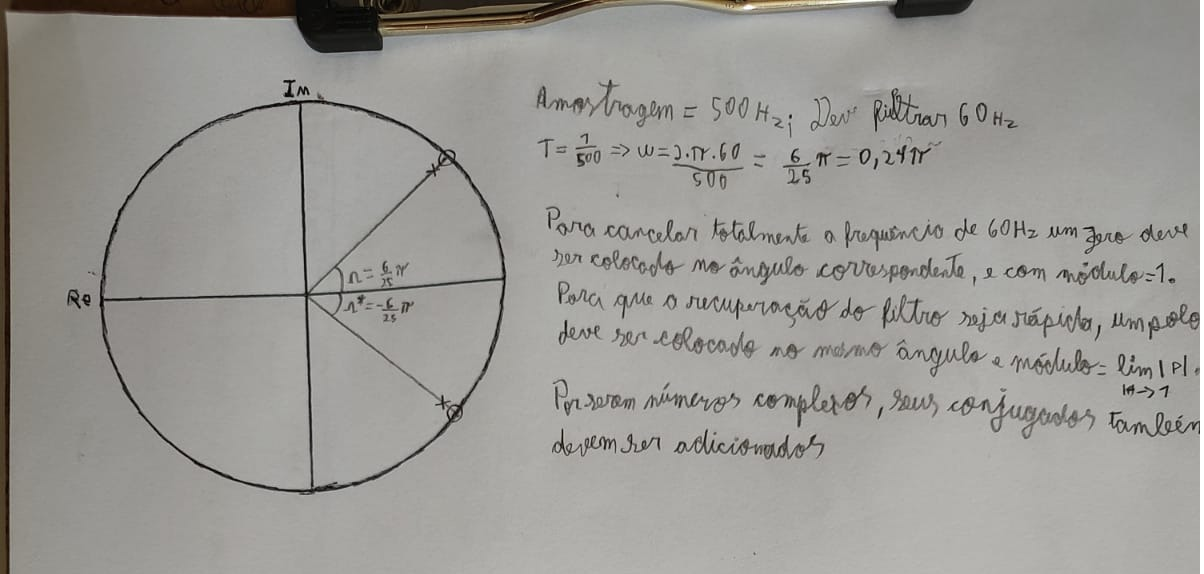

In [468]:
# Não consegui fazer funcionar o gráfico em comentário kk

## Questão 1b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

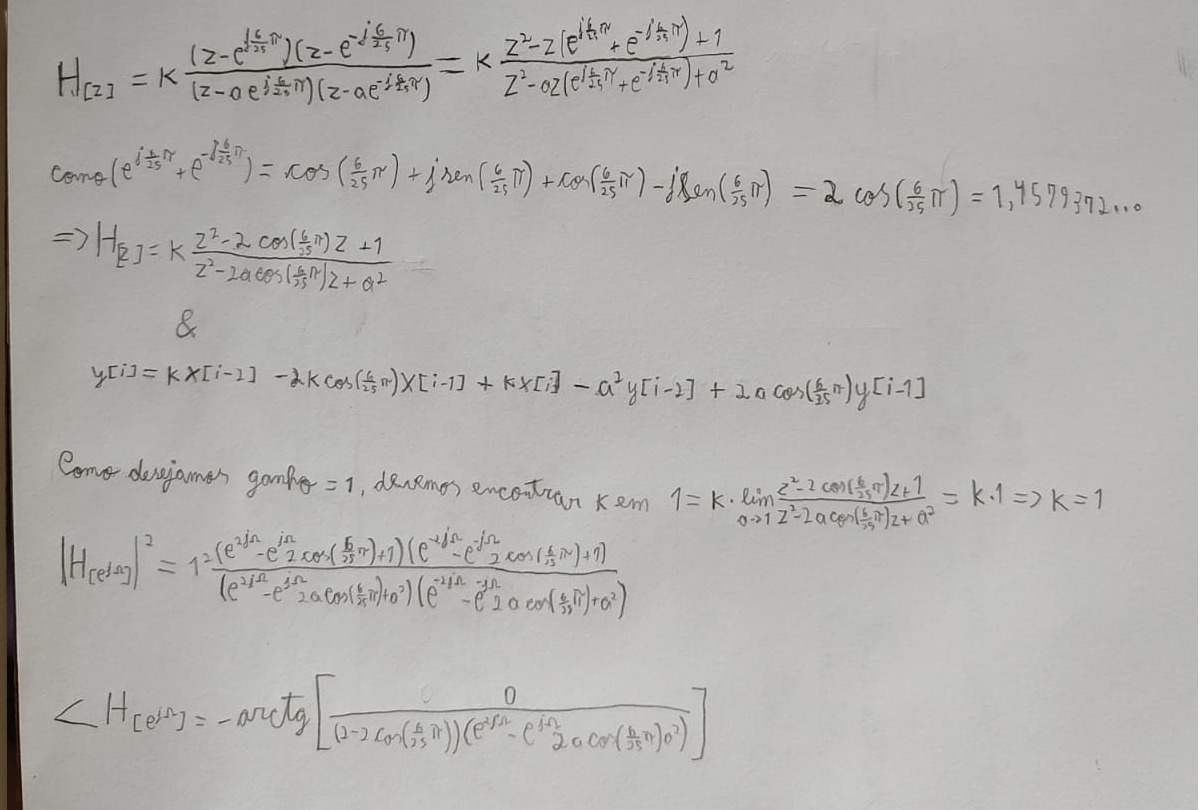

## Questão 1c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

Gráfico da resposta em magnitude


c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


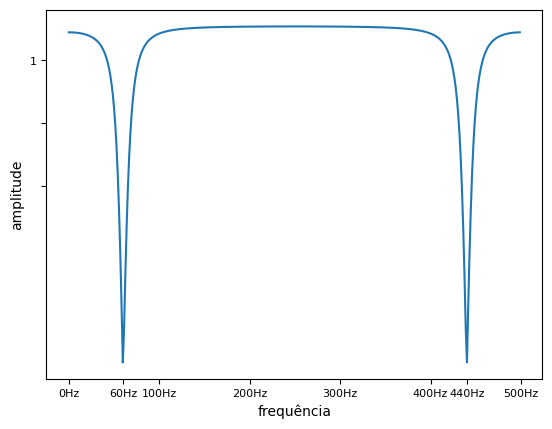

Gráfico da resposta em fase


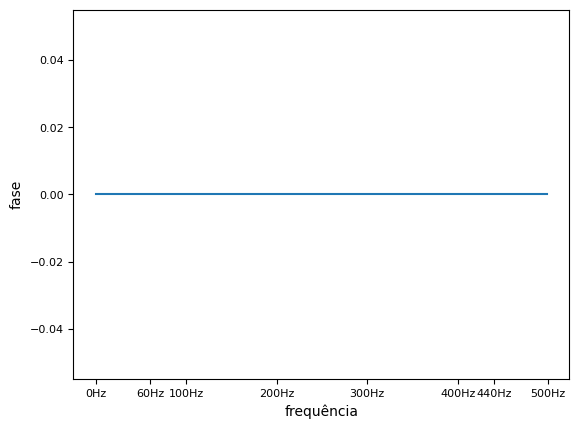

In [469]:


rm = []
rf = []
for j in range(360):
    rm.append(resposta_magnitude(j, 0.9))
    rf.append(resposta_fase(j, 0.9))


print("Gráfico da resposta em magnitude")
plt.plot(rm)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.xticks([0, 43.2, 72, 144, 216, 288, 316.8, 360], ["0Hz", "60Hz", "100Hz", "200Hz", "300Hz", "400Hz", "440Hz", "500Hz"])
plt.yticks([0.6, 0.8, 1], [" ", " ", "1"])
plt.xlabel("frequência")
plt.ylabel("amplitude")
plt.show()

print("Gráfico da resposta em fase")
plt.plot(rf)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.xticks([0, 43.2, 72, 144, 216, 288, 316.8, 360], ["0Hz", "60Hz", "100Hz", "200Hz", "300Hz", "400Hz", "440Hz", "500Hz"])
plt.xlabel("frequência")
plt.ylabel("fase")
plt.show()



## Questão 1d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

Gráfico do sinal noisy_ecg_data.mat


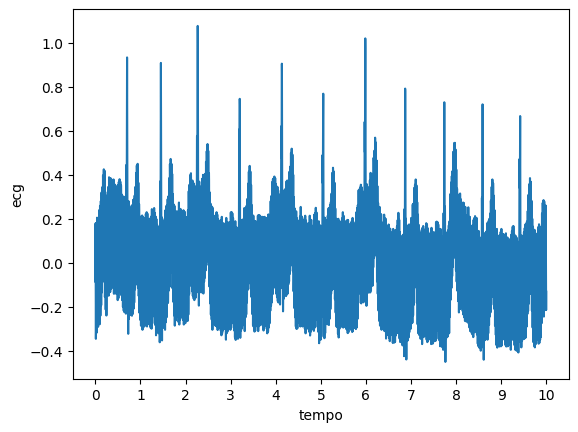

Gráfico do sinal filtrado


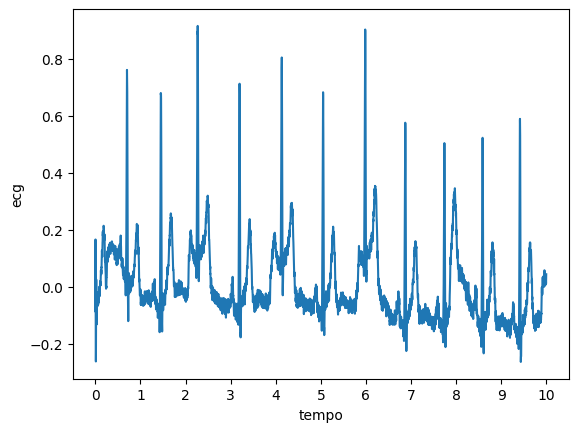

In [470]:
sinal = sp.io.loadmat('noisy_ecg_data.mat')['noisy_ecg'].ravel()
sinal_filtrado = filtro1(sinal)

print("Gráfico do sinal noisy_ecg_data.mat")
plt.plot(sinal)
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.xlabel("tempo")
plt.ylabel("ecg")
plt.show()

print("Gráfico do sinal filtrado")
plt.plot(sinal_filtrado)
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.xlabel("tempo")
plt.ylabel("ecg")
plt.show()

# Questão 2

Ainda no sistema de aquisição de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interferência da rede elétrica (i.e., o sinal não tem um ruído específico em 60Hz), o sinal adquirido tinha bastante ruído de alta frequência (acima de 35Hz). O objetivo desta questão é projetar um filtro digital para atenuar as frequências acima de 35Hz. A frequêencia de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.

## Questão 2a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

In [471]:
#Resposta da questão 2a

## Questão 2b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

In [472]:
#Resposta da questão 2b

## Questão 2c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

In [473]:
#Resposta da questão 2c

## Questão 2d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

In [474]:
#Resposta da questão 2d

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

# Questão 3

Considere o filtro analógico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$

## Questão 3a (1  ponto)

Projete uma aproximação digital para este filtro com critério de 10%. Indique a taxa de amostragem calculada para esta aproximação (T1) e compare a resposta em frequência do filtro projetado H1() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

In [475]:
#Resposta da questão 3a

## Questão 3b (1  ponto)

Projete uma aproximação digital para este filtro com critério de 1%. Indique a taxa de amostragem calculada para esta aproximação (T2) e compare a resposta em frequência do filtro projetado H2() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

In [476]:
#Resposta da questão 3b

## Questão 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro analógico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.

In [477]:
#Resposta da questão 3c

## Questão 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta teórica do filtro analógico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproximações y1[n] e y2[n]. 

In [478]:
#Resposta da questão 3d